In [1]:
#importing Req package
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#for MC 

from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, confusion_matrix
from collections import Counter
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv(r'C:\Users\shubh\fifa\Data\players_20.csv')

In [3]:
pd. set_option('display.max_columns', 500)


In [4]:
data.head()

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,release_clause_eur,player_tags,team_position,team_jersey_number,loaned_from,joined,contract_valid_until,nation_position,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,32,1987-06-24,170,72,Argentina,FC Barcelona,94,94,95500000,565000,"RW, CF, ST",Left,5,4,4,Medium/Low,Messi,Yes,195800000.0,"#Dribbler, #Distance Shooter, #Crosser, #FK Sp...",RW,10.0,NaN,2004-07-01,2021.0,NaN,NaN,87.0,92.0,92.0,96.0,39.0,66.0,NaN,NaN,NaN,NaN,NaN,NaN,"Beat Offside Trap, Argues with Officials, Earl...",88,95,70,92,88,97,93,94,92,96,91,84,93,95,95,86,68,75,68,94,48,40,94,94,75,96,33,37,26,6,11,15,14,8,89+2,89+2,89+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,92+2,87+2,87+2,87+2,92+2,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,1985-02-05,187,83,Portugal,Juventus,93,93,58500000,405000,"ST, LW",Right,5,4,5,High/Low,C. Ronaldo,Yes,96500000.0,"#Speedster, #Dribbler, #Distance Shooter, #Acr...",LW,7.0,NaN,2018-07-10,2022.0,LS,7.0,90.0,93.0,82.0,89.0,35.0,78.0,NaN,NaN,NaN,NaN,NaN,NaN,"Long Throw-in, Selfish, Argues with Officials,...",84,94,89,83,87,89,81,76,77,92,89,91,87,96,71,95,95,85,78,93,63,29,95,82,85,95,28,32,24,7,11,15,14,11,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
2,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Junior,27,1992-02-05,175,68,Brazil,Paris Saint-Germain,92,92,105500000,290000,"LW, CAM",Right,5,5,5,High/Medium,Neymar,Yes,195200000.0,"#Speedster, #Dribbler, #Playmaker , #Crosser,...",CAM,10.0,NaN,2017-08-03,2022.0,LW,10.0,91.0,85.0,87.0,95.0,32.0,58.0,NaN,NaN,NaN,NaN,NaN,NaN,"Power Free-Kick, Injury Free, Selfish, Early C...",87,87,62,87,87,96,88,87,81,95,94,89,96,92,84,80,61,81,49,84,51,36,87,90,90,94,27,26,29,9,9,15,15,11,84+3,84+3,84+3,90+3,89+3,89+3,89+3,90+3,90+3,90+3,90+3,89+3,82+3,82+3,82+3,89+3,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3
3,200389,https://sofifa.com/player/200389/jan-oblak/20/...,J. Oblak,Jan Oblak,26,1993-01-07,188,87,Slovenia,Atlético Madrid,91,93,77500000,125000,GK,Right,3,3,1,Medium/Medium,Normal,Yes,164700000.0,NaN,GK,13.0,NaN,2014-07-16,2023.0,GK,1.0,NaN,NaN,NaN,NaN,NaN,NaN,87.0,92.0,78.0,89.0,52.0,90.0,"Flair, Acrobatic Clearance",13,11,15,43,13,12,13,14,40,30,43,60,67,88,49,59,78,41,78,12,34,19,11,65,11,68,27,12,18,87,92,78,90,89,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,183277,https://sofifa.com/player/183277/eden-hazard/2...,E. Hazard,Eden Hazard,28,1991-01-07,175,74,Belgium,Real Madrid,91,91,90000000,470000,"LW, CF",Right,4,4,4,High/Medium,Normal,Yes,184500000.0,"#Speedster, #Dribbler, #Acrobat",LW,7.0,NaN,2019-07-01,

In [5]:
data.shape

(18278, 104)

In [6]:
data.isnull().sum()

sofifa_id        0
player_url       0
short_name       0
long_name        0
age              0
              ... 
lb            2036
lcb           2036
cb            2036
rcb           2036
rb            2036
Length: 104, dtype: int64

In [7]:
data.describe

<bound method NDFrame.describe of        sofifa_id                                         player_url  \
0         158023  https://sofifa.com/player/158023/lionel-messi/...   
1          20801  https://sofifa.com/player/20801/c-ronaldo-dos-...   
2         190871  https://sofifa.com/player/190871/neymar-da-sil...   
3         200389  https://sofifa.com/player/200389/jan-oblak/20/...   
4         183277  https://sofifa.com/player/183277/eden-hazard/2...   
...          ...                                                ...   
18273     245006  https://sofifa.com/player/245006/shuai-shao/20...   
18274     250995  https://sofifa.com/player/250995/mingjie-xiao/...   
18275     252332  https://sofifa.com/player/252332/wei-zhang/20/...   
18276     251110  https://sofifa.com/player/251110/haijian-wang/...   
18277     233449  https://sofifa.com/player/233449/ximing-pan/20...   

              short_name                            long_name  age  \
0               L. Messi       Lionel André

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18278 entries, 0 to 18277
Columns: 104 entries, sofifa_id to rb
dtypes: float64(16), int64(45), object(43)
memory usage: 14.5+ MB


In [9]:
for col in data.columns:
    print(col)

sofifa_id
player_url
short_name
long_name
age
dob
height_cm
weight_kg
nationality
club
overall
potential
value_eur
wage_eur
player_positions
preferred_foot
international_reputation
weak_foot
skill_moves
work_rate
body_type
real_face
release_clause_eur
player_tags
team_position
team_jersey_number
loaned_from
joined
contract_valid_until
nation_position
nation_jersey_number
pace
shooting
passing
dribbling
defending
physic
gk_diving
gk_handling
gk_kicking
gk_reflexes
gk_speed
gk_positioning
player_traits
attacking_crossing
attacking_finishing
attacking_heading_accuracy
attacking_short_passing
attacking_volleys
skill_dribbling
skill_curve
skill_fk_accuracy
skill_long_passing
skill_ball_control
movement_acceleration
movement_sprint_speed
movement_agility
movement_reactions
movement_balance
power_shot_power
power_jumping
power_stamina
power_strength
power_long_shots
mentality_aggression
mentality_interceptions
mentality_positioning
mentality_vision
mentality_penalties
mentality_composure
defe

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18278 entries, 0 to 18277
Columns: 104 entries, sofifa_id to rb
dtypes: float64(16), int64(45), object(43)
memory usage: 14.5+ MB


In [11]:
pd.set_option('display.max_rows',500)


In [12]:
print(list(data.columns))

['sofifa_id', 'player_url', 'short_name', 'long_name', 'age', 'dob', 'height_cm', 'weight_kg', 'nationality', 'club', 'overall', 'potential', 'value_eur', 'wage_eur', 'player_positions', 'preferred_foot', 'international_reputation', 'weak_foot', 'skill_moves', 'work_rate', 'body_type', 'real_face', 'release_clause_eur', 'player_tags', 'team_position', 'team_jersey_number', 'loaned_from', 'joined', 'contract_valid_until', 'nation_position', 'nation_jersey_number', 'pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic', 'gk_diving', 'gk_handling', 'gk_kicking', 'gk_reflexes', 'gk_speed', 'gk_positioning', 'player_traits', 'attacking_crossing', 'attacking_finishing', 'attacking_heading_accuracy', 'attacking_short_passing', 'attacking_volleys', 'skill_dribbling', 'skill_curve', 'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed', 'movement_agility', 'movement_reactions', 'movement_balance', 'power_shot_power', 'power_

In [13]:
data.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18278 entries, 0 to 18277
Data columns (total 104 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   sofifa_id                   18278 non-null  int64  
 1   player_url                  18278 non-null  object 
 2   short_name                  18278 non-null  object 
 3   long_name                   18278 non-null  object 
 4   age                         18278 non-null  int64  
 5   dob                         18278 non-null  object 
 6   height_cm                   18278 non-null  int64  
 7   weight_kg                   18278 non-null  int64  
 8   nationality                 18278 non-null  object 
 9   club                        18278 non-null  object 
 10  overall                     18278 non-null  int64  
 11  potential                   18278 non-null  int64  
 12  value_eur                   18278 non-null  int64  
 13  wage_eur                    18

# Domain analysis

In [14]:
#'sofifa_id,player_url','long_name','dob,player_tags','team_jersey_number','contract_valid_until','nation_jersey_number'

In [15]:

data.drop(['dob','player_tags','team_jersey_number','contract_valid_until'],axis=1,inplace=True)


In [16]:
data.drop(['loaned_from','nation_position','joined','nation_jersey_number','work_rate','body_type','real_face'],axis=1,inplace=True)                

In [17]:
data.drop(['sofifa_id','player_url','long_name'],axis=1,inplace=True)


In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18278 entries, 0 to 18277
Data columns (total 90 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   short_name                  18278 non-null  object 
 1   age                         18278 non-null  int64  
 2   height_cm                   18278 non-null  int64  
 3   weight_kg                   18278 non-null  int64  
 4   nationality                 18278 non-null  object 
 5   club                        18278 non-null  object 
 6   overall                     18278 non-null  int64  
 7   potential                   18278 non-null  int64  
 8   value_eur                   18278 non-null  int64  
 9   wage_eur                    18278 non-null  int64  
 10  player_positions            18278 non-null  object 
 11  preferred_foot              18278 non-null  object 
 12  international_reputation    18278 non-null  int64  
 13  weak_foot                   182

In [19]:
data.describe()

,age,height_cm,weight_kg,overall,potential,value_eur,wage_eur,international_reputation,weak_foot,skill_moves,release_clause_eur,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
count,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,1.827800e+04,18278.000000,18278.000000,18278.000000,18278.000000,1.698000e+04,16242.000000,16242.000000,16242.000000,16242.000000,16242.000000,16242.000000,2036.000000,2036.000000,2036.000000,2036.000000,2036.000000,2036.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000
mean,25.283291,181.362184,75.276343,66.244994,71.546887,2.484038e+06,9456.942773,1.103184,2.944250,2.368038,4.740717e+06,67.700899,52.298301,57.233777,62.531585,51.553503,64.876678,65.422397,63.146365,61.832515,66.390472,37.798625,63.374754,49.718405,45.590218,52.221468,58.748003,42.809388,55.596509,47.325692,42.708885,52.768848,58.461976,64.299923,64.415746,63.504924,61.752544,63.856439,58.181694,64.928165,62.889485,65.234763,46.812945,55.742149,46.380239,50.072163,53.609749,48.383357,58.528778,46.848889,47.640333,45.606631,16.572765,16.354853,16.212934,16.368038,16.709924
std,4.656964,6.756961,7.047744,6.949953,6.139669,5.585481e+06,21351.714095,0.378861,0.664656,0.765038,1.103002e+07,11.297656,14.029418,10.407844,10.284950,16.419528,9.760162,7.736278,7.244023,7.510709,8.154062,10.634038,8.447876,18.325403,19.594609,17.428429,14.679653,17.701815,18.929118,18.422991,17.433612,15.246454,16.741878,15.042232,14.847763,14.808380,9.135613,14.201559,13.326083,11.934059,16.017954,12.534811,19.322343,17.318157,20.775812,19.594022,13.955626,15.708099,11.880840,20.091287,21.585641,21.217734,17.738069,16.996925,16.613665,17.136497,18.038125
min,16.000000,156.000000,50.000000,48.000000,49.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,1.300000e+04,24.000000,15.000000,24.000000,23.000000,15.000000,27.000000,44.000000,42.000000,35.000000,45.000000,12.000000,41.000000,5.000000,2.000000,5.000000,7.000000,3.000000,4.000000,6.000000,4.000000,8.000000,5.000000,12.000000,11.000000,11.000000,21.000000,12.000000,14.000000,19.000000,12.000000,20.000000,4.000000,9.000000,3.000000,2.000000,9.000000,7.000000,12.000000,1.000000,5.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,22.000000,177.000000,70.000000,62.000000,67.000000,3.250000e+05,1000.000000,1.000000,3.000000,2.000000,5.630000e+05,61.000000,42.000000,50.000000,57.000000,36.000000,59.000000,60.000000,58.000000,57.000000,60.750000,29.000000,58.000000,38.000000,30.000000,44.000000,54.000000,30.000000,50.000000,34.000000,31.000000,43.000000,54.000000,56.000000,57.000000,55.000000,56.000000,56.000000,48.000000,58.000000,56.000000,58.000000,32.000000,44.000000,25.000000,39.000000,44.000000,39.000000,51.000000,29.000000,27.000000,24.000000,8.000000,8.000000,8.000000,8.000000,8.000000
50%,25.000000,181.000000,75.000000,66.000000,71.000000,7.000000e+05,3000

In [20]:
data.isnull().sum()

short_name                        0
age                               0
height_cm                         0
weight_kg                         0
nationality                       0
club                              0
overall                           0
potential                         0
value_eur                         0
wage_eur                          0
player_positions                  0
preferred_foot                    0
international_reputation          0
weak_foot                         0
skill_moves                       0
release_clause_eur             1298
team_position                   240
pace                           2036
shooting                       2036
passing                        2036
dribbling                      2036
defending                      2036
physic                         2036
gk_diving                     16242
gk_handling                   16242
gk_kicking                    16242
gk_reflexes                   16242
gk_speed                    

# Imputing Nan value

 imputing nan value of empty lb, rb etc value by analysisng the data

In [21]:
a=list(data.loc[pd.isna(data['st']), :].index)
a

[3,
 6,
 13,
 14,
 25,
 28,
 30,
 31,
 32,
 53,
 60,
 74,
 86,
 87,
 88,
 91,
 111,
 122,
 125,
 130,
 131,
 137,
 167,
 181,
 184,
 193,
 196,
 200,
 201,
 202,
 206,
 211,
 223,
 242,
 248,
 250,
 251,
 257,
 264,
 267,
 268,
 272,
 286,
 293,
 294,
 324,
 333,
 342,
 351,
 364,
 365,
 376,
 386,
 388,
 415,
 427,
 431,
 456,
 460,
 466,
 467,
 485,
 486,
 489,
 492,
 493,
 496,
 498,
 499,
 500,
 508,
 511,
 518,
 537,
 558,
 565,
 572,
 627,
 628,
 648,
 667,
 682,
 697,
 704,
 714,
 725,
 747,
 751,
 753,
 782,
 792,
 807,
 808,
 814,
 842,
 850,
 861,
 865,
 875,
 887,
 899,
 907,
 915,
 933,
 955,
 967,
 981,
 983,
 993,
 1019,
 1072,
 1074,
 1090,
 1094,
 1099,
 1101,
 1111,
 1124,
 1130,
 1134,
 1136,
 1138,
 1157,
 1161,
 1174,
 1186,
 1217,
 1234,
 1240,
 1257,
 1283,
 1287,
 1292,
 1300,
 1302,
 1316,
 1328,
 1346,
 1357,
 1372,
 1373,
 1374,
 1385,
 1386,
 1389,
 1394,
 1396,
 1398,
 1403,
 1421,
 1429,
 1435,
 1450,
 1453,
 1458,
 1460,
 1480,
 1490,
 1518,
 1532,
 1542,


In [22]:
data1=data.iloc[a]

In [23]:
print(data1['player_positions'].unique())

['GK']


#As we can find out that all the missing values are of GK so we can impute it with zero as all other position of GK are invalid

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18278 entries, 0 to 18277
Data columns (total 90 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   short_name                  18278 non-null  object 
 1   age                         18278 non-null  int64  
 2   height_cm                   18278 non-null  int64  
 3   weight_kg                   18278 non-null  int64  
 4   nationality                 18278 non-null  object 
 5   club                        18278 non-null  object 
 6   overall                     18278 non-null  int64  
 7   potential                   18278 non-null  int64  
 8   value_eur                   18278 non-null  int64  
 9   wage_eur                    18278 non-null  int64  
 10  player_positions            18278 non-null  object 
 11  preferred_foot              18278 non-null  object 
 12  international_reputation    18278 non-null  int64  
 13  weak_foot                   182

In [25]:
#converting str data type to int and adding the sum
def dataconverter(val):
    if type(val)== str:
        a=val[0:2]
        b=val[-1]
        val= int(a)+int(b)
        return val
position=['ls','st','rs','lw','lf','cf','rf','rw','lam','cam','ram','lm','lcm','cm','rcm','rm','lwb','ldm','cdm','rdm','rwb','lb','lcb','cb','rcb','rb']

for col in position:
    data[col]= data[col].apply(dataconverter)
    data[col].fillna(0.0,inplace=True)
#data=data['lb'].astype(float)


In [26]:
#position=['ls','st','rs','lw','lf','cf','rf','rw','lam','cam','ram','lm','lcm','cm','rcm','rm','lwb','ldm','cdm','rdm','rwb','lb','lcb','cb','rcb','rb']


In [27]:
#imputing overaall

In [28]:
print(data['release_clause_eur'].median())
print(data['release_clause_eur'].mean())


1200000.0
4740717.432273263


In [29]:
a1=list(data.loc[pd.isna(data['release_clause_eur']), :].index)


In [30]:
a1

[68,
 140,
 159,
 187,
 212,
 322,
 327,
 328,
 336,
 342,
 407,
 408,
 409,
 410,
 412,
 518,
 530,
 565,
 566,
 567,
 572,
 585,
 625,
 627,
 648,
 694,
 724,
 728,
 749,
 750,
 751,
 752,
 765,
 791,
 801,
 805,
 816,
 868,
 885,
 888,
 917,
 921,
 925,
 941,
 961,
 979,
 989,
 990,
 991,
 996,
 1012,
 1015,
 1017,
 1018,
 1019,
 1037,
 1039,
 1053,
 1059,
 1087,
 1117,
 1125,
 1160,
 1184,
 1219,
 1236,
 1237,
 1249,
 1250,
 1251,
 1252,
 1253,
 1257,
 1262,
 1292,
 1319,
 1337,
 1339,
 1351,
 1371,
 1399,
 1410,
 1412,
 1422,
 1425,
 1434,
 1444,
 1491,
 1502,
 1518,
 1539,
 1543,
 1553,
 1554,
 1557,
 1565,
 1566,
 1579,
 1609,
 1610,
 1611,
 1612,
 1613,
 1614,
 1616,
 1627,
 1630,
 1636,
 1645,
 1649,
 1650,
 1651,
 1690,
 1691,
 1692,
 1709,
 1716,
 1733,
 1773,
 1788,
 1800,
 1813,
 1868,
 1872,
 1880,
 1899,
 1941,
 1944,
 1955,
 1973,
 1995,
 2001,
 2008,
 2047,
 2071,
 2092,
 2119,
 2120,
 2151,
 2169,
 2170,
 2176,
 2186,
 2197,
 2198,
 2201,
 2202,
 2215,
 2221,
 2224,
 

In [31]:
data2=data.iloc[a1]
print(data2['overall'].mean())

67.05084745762711


#As we see that the overall is very low for the players without 'release_clause_eur' so we will impute it with median 

In [32]:
data['release_clause_eur'].fillna(data['release_clause_eur'].median(),inplace=True)
#data[col].fillna(0.0,inplace=True)


In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18278 entries, 0 to 18277
Data columns (total 90 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   short_name                  18278 non-null  object 
 1   age                         18278 non-null  int64  
 2   height_cm                   18278 non-null  int64  
 3   weight_kg                   18278 non-null  int64  
 4   nationality                 18278 non-null  object 
 5   club                        18278 non-null  object 
 6   overall                     18278 non-null  int64  
 7   potential                   18278 non-null  int64  
 8   value_eur                   18278 non-null  int64  
 9   wage_eur                    18278 non-null  int64  
 10  player_positions            18278 non-null  object 
 11  preferred_foot              18278 non-null  object 
 12  international_reputation    18278 non-null  int64  
 13  weak_foot                   182

In [34]:
data.head()

,short_name,age,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,release_clause_eur,team_position,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,L. Messi,32,170,72,Argentina,FC Barcelona,94,94,95500000,565000,"RW, CF, ST",Left,5,4,4,195800000.0,RW,87.0,92.0,92.0,96.0,39.0,66.0,NaN,NaN,NaN,NaN,NaN,NaN,"Beat Offside Trap, Argues with Officials, Earl...",88,95,70,92,88,97,93,94,92,96,91,84,93,95,95,86,68,75,68,94,48,40,94,94,75,96,33,37,26,6,11,15,14,8,91.0,91.0,91.0,95.0,95.0,95.0,95.0,95.0,95.0,95.0,95.0,94.0,89.0,89.0,89.0,94.0,70.0,68.0,68.0,68.0,70.0,65.0,54.0,54.0,54.0,65.0
1,Cristiano Ronaldo,34,187,83,Portugal,Juventus,93,93,58500000,405000,"ST, LW",Right,5,4,5,96500000.0,LW,90.0,93.0,82.0,89.0,35.0,78.0,NaN,NaN,NaN,NaN,NaN,NaN,"Long Throw-in, Selfish, Argues with Officials,...",84,94,89,83,87,89,81,76,77,92,89,91,87,96,71,95,95,85,78,93,63,29,95,82,85,95,28,32,24,7,11,15,14,11,94.0,94.0,94.0,92.0,93.0,93.0,93.0,92.0,91.0,91.0,91.0,91.0,84.0,84.0,84.0,91.0,68.0,64.0,64.0,64.0,68.0,64.0,56.0,56.0,56.0,64.0
2,Neymar Jr,27,175,68,Brazil,Paris Saint-Germain,92,92,105500000,290000,"LW, CAM",Right,5,5,5,195200000.0,CAM,91.0,85.0,87.0,95.0,32.0,58.0,NaN,NaN,NaN,NaN,NaN,NaN,"Power Free-Kick, Injury Free, Selfish, Early C...",87,87,62,87,87,96,88,87,81,95,94,89,96,92,84,80,61,81,49,84,51,36,87,90,90,94,27,26,29,9,9,15,15,11,87.0,87.0,87.0,93.0,92.0,92.0,92.0,93.0,93.0,93.0,93.0,92.0,85.0,85.0,85.0,92.0,69.0,64.0,64.0,64.0,69.0,64.0,49.0,49.0,49.0,64.0
3,J. Oblak,26,188,87,Slovenia,Atlético Madrid,91,93,77500000,125000,GK,Right,3,3,1,164700000.0,GK,NaN,NaN,NaN,NaN,NaN,NaN,87.0,92.0,78.0,89.0,52.0,90.0,"Flair, Acrobatic Clearance",13,11,15,43,13,12,13,14,40,30,43,60,67,88,49,59,78,41,78,12,34,19,11,65,11,68,27,12,18,87,92,78,90,89,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,E. Hazard,28,175,74,Belgium,Real Madrid,91,91,90000000,470000,"LW, CF",Right,4,4,4,184500000.0,LW,91.0,83.0,86.0,94.0,35.0,66.0,NaN,NaN,NaN,NaN,NaN,NaN,"Beat Offside Trap, Selfish, Finesse Shot, Spee...",81,84,61,89,83,95,83,79,83,94,94,88,95,90,94,82,56,84,63,80,54,41,87,89,88,91,34,27,22,11,12,6,8,8,86.0,86.0,86.0,92.0,91.0,91.0,91.0,92.0,92.0,92.0,92.0,92.0,86.0,86.0,86.0,92.0,69.0,66.0,66.0,66.0,69.0,64.0,52.0,52.0,52.0,64.0


In [35]:
data['team_position'].fillna('unKnown',inplace=True)

  Imputing PACE, shooting, passing, dribbling, defending, physic                         

In [36]:
data['pace'].fillna(0.0,inplace=True)
data['shooting'].fillna(0.0,inplace=True)
data['passing'].fillna(0.0,inplace=True)
data['dribbling'].fillna(0.0,inplace=True)
data['physic'].fillna(0.0,inplace=True)
data['defending'].fillna(0.0,inplace=True)                   
data['gk_diving'].fillna(0.0,inplace=True)
data['gk_handling'].fillna(0.0,inplace=True)
data['gk_kicking'].fillna(0.0,inplace=True)
data['gk_reflexes'].fillna(0.0,inplace=True)
data['gk_speed'].fillna(0.0,inplace=True)
data['gk_positioning'].fillna(0.0,inplace=True)


In [37]:
data.head()

,short_name,age,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,release_clause_eur,team_position,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,L. Messi,32,170,72,Argentina,FC Barcelona,94,94,95500000,565000,"RW, CF, ST",Left,5,4,4,195800000.0,RW,87.0,92.0,92.0,96.0,39.0,66.0,0.0,0.0,0.0,0.0,0.0,0.0,"Beat Offside Trap, Argues with Officials, Earl...",88,95,70,92,88,97,93,94,92,96,91,84,93,95,95,86,68,75,68,94,48,40,94,94,75,96,33,37,26,6,11,15,14,8,91.0,91.0,91.0,95.0,95.0,95.0,95.0,95.0,95.0,95.0,95.0,94.0,89.0,89.0,89.0,94.0,70.0,68.0,68.0,68.0,70.0,65.0,54.0,54.0,54.0,65.0
1,Cristiano Ronaldo,34,187,83,Portugal,Juventus,93,93,58500000,405000,"ST, LW",Right,5,4,5,96500000.0,LW,90.0,93.0,82.0,89.0,35.0,78.0,0.0,0.0,0.0,0.0,0.0,0.0,"Long Throw-in, Selfish, Argues with Officials,...",84,94,89,83,87,89,81,76,77,92,89,91,87,96,71,95,95,85,78,93,63,29,95,82,85,95,28,32,24,7,11,15,14,11,94.0,94.0,94.0,92.0,93.0,93.0,93.0,92.0,91.0,91.0,91.0,91.0,84.0,84.0,84.0,91.0,68.0,64.0,64.0,64.0,68.0,64.0,56.0,56.0,56.0,64.0
2,Neymar Jr,27,175,68,Brazil,Paris Saint-Germain,92,92,105500000,290000,"LW, CAM",Right,5,5,5,195200000.0,CAM,91.0,85.0,87.0,95.0,32.0,58.0,0.0,0.0,0.0,0.0,0.0,0.0,"Power Free-Kick, Injury Free, Selfish, Early C...",87,87,62,87,87,96,88,87,81,95,94,89,96,92,84,80,61,81,49,84,51,36,87,90,90,94,27,26,29,9,9,15,15,11,87.0,87.0,87.0,93.0,92.0,92.0,92.0,93.0,93.0,93.0,93.0,92.0,85.0,85.0,85.0,92.0,69.0,64.0,64.0,64.0,69.0,64.0,49.0,49.0,49.0,64.0
3,J. Oblak,26,188,87,Slovenia,Atlético Madrid,91,93,77500000,125000,GK,Right,3,3,1,164700000.0,GK,0.0,0.0,0.0,0.0,0.0,0.0,87.0,92.0,78.0,89.0,52.0,90.0,"Flair, Acrobatic Clearance",13,11,15,43,13,12,13,14,40,30,43,60,67,88,49,59,78,41,78,12,34,19,11,65,11,68,27,12,18,87,92,78,90,89,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,E. Hazard,28,175,74,Belgium,Real Madrid,91,91,90000000,470000,"LW, CF",Right,4,4,4,184500000.0,LW,91.0,83.0,86.0,94.0,35.0,66.0,0.0,0.0,0.0,0.0,0.0,0.0,"Beat Offside Trap, Selfish, Finesse Shot, Spee...",81,84,61,89,83,95,83,79,83,94,94,88,95,90,94,82,56,84,63,80,54,41,87,89,88,91,34,27,22,11,12,6,8,8,86.0,86.0,86.0,92.0,91.0,91.0,91.0,92.0,92.0,92.0,92.0,92.0,86.0,86.0,86.0,92.0,69.0,66.0,66.0,66.0,69.0,64.0,52.0,52.0,52.0,64.0


In [38]:
data.isnull().sum()

short_name                        0
age                               0
height_cm                         0
weight_kg                         0
nationality                       0
club                              0
overall                           0
potential                         0
value_eur                         0
wage_eur                          0
player_positions                  0
preferred_foot                    0
international_reputation          0
weak_foot                         0
skill_moves                       0
release_clause_eur                0
team_position                     0
pace                              0
shooting                          0
passing                           0
dribbling                         0
defending                         0
physic                            0
gk_diving                         0
gk_handling                       0
gk_kicking                        0
gk_reflexes                       0
gk_speed                    

In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18278 entries, 0 to 18277
Data columns (total 90 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   short_name                  18278 non-null  object 
 1   age                         18278 non-null  int64  
 2   height_cm                   18278 non-null  int64  
 3   weight_kg                   18278 non-null  int64  
 4   nationality                 18278 non-null  object 
 5   club                        18278 non-null  object 
 6   overall                     18278 non-null  int64  
 7   potential                   18278 non-null  int64  
 8   value_eur                   18278 non-null  int64  
 9   wage_eur                    18278 non-null  int64  
 10  player_positions            18278 non-null  object 
 11  preferred_foot              18278 non-null  object 
 12  international_reputation    18278 non-null  int64  
 13  weak_foot                   182

In [40]:
data['player_traits'].unique()

array(['Beat Offside Trap, Argues with Officials, Early Crosser, Finesse Shot, Speed Dribbler (CPU AI Only), 1-on-1 Rush, Giant Throw-in, Outside Foot Shot',
       'Long Throw-in, Selfish, Argues with Officials, Early Crosser, Speed Dribbler (CPU AI Only), Skilled Dribbling',
       'Power Free-Kick, Injury Free, Selfish, Early Crosser, Speed Dribbler (CPU AI Only), Crowd Favourite',
       'Flair, Acrobatic Clearance',
       'Beat Offside Trap, Selfish, Finesse Shot, Speed Dribbler (CPU AI Only), Crowd Favourite',
       'Power Free-Kick, Avoids Using Weaker Foot, Dives Into Tackles (CPU AI Only), Leadership, Argues with Officials, Finesse Shot',
       'Swerve Pass, Acrobatic Clearance, Flair Passes',
       'Diver, Avoids Using Weaker Foot, Leadership, Long Passer (CPU AI Only)',
       'Argues with Officials, Finesse Shot, Speed Dribbler (CPU AI Only), Crowd Favourite',
       'Beat Offside Trap, Argues with Officials, Early Crosser, Speed Dribbler (CPU AI Only), Outside Foot Sho

Imputing player traits

In [41]:
b=list(data.loc[pd.isna(data['player_traits']), :].index)
b

[51,
 57,
 59,
 61,
 76,
 77,
 79,
 87,
 88,
 91,
 94,
 165,
 167,
 170,
 173,
 177,
 188,
 204,
 208,
 235,
 246,
 260,
 274,
 277,
 279,
 297,
 327,
 332,
 342,
 349,
 350,
 360,
 373,
 376,
 395,
 403,
 412,
 414,
 415,
 423,
 437,
 442,
 443,
 455,
 460,
 468,
 474,
 484,
 501,
 511,
 521,
 530,
 534,
 541,
 561,
 563,
 564,
 566,
 567,
 573,
 576,
 579,
 586,
 592,
 593,
 597,
 600,
 606,
 612,
 618,
 632,
 635,
 637,
 638,
 641,
 644,
 658,
 661,
 684,
 711,
 713,
 715,
 723,
 729,
 734,
 740,
 741,
 742,
 746,
 753,
 755,
 760,
 769,
 774,
 780,
 781,
 784,
 786,
 789,
 792,
 793,
 794,
 814,
 821,
 827,
 831,
 838,
 839,
 842,
 845,
 847,
 848,
 853,
 858,
 865,
 889,
 897,
 906,
 907,
 915,
 916,
 917,
 925,
 926,
 927,
 932,
 934,
 941,
 952,
 958,
 967,
 992,
 993,
 994,
 997,
 1005,
 1009,
 1012,
 1013,
 1017,
 1022,
 1033,
 1041,
 1045,
 1048,
 1053,
 1054,
 1055,
 1056,
 1058,
 1067,
 1079,
 1080,
 1081,
 1082,
 1086,
 1097,
 1112,
 1117,
 1120,
 1133,
 1139,
 1160,
 1176

In [42]:
data2=data.iloc[b]

In [43]:
print(data2['player_positions'].unique())

['LB' 'CB' 'RB, CM, CDM' 'CDM, CM' 'GK' 'RB' 'CM, CDM' 'ST' 'RB, RM, CM'
 'CB, LB, RB' 'CB, RB' 'RW, RM' 'CM, CAM' 'CDM' 'LB, LM' 'CM, CAM, CDM'
 'CDM, CM, LM' 'CB, CDM' 'LWB, LB' 'LB, LWB' 'RB, RWB' 'RWB, RM, RB' 'CM'
 'ST, RW, RM' 'ST, LM' 'RB, RM, CB' 'LM, RM' 'LB, CDM' 'CDM, CB, CM'
 'CB, RB, LB' 'CAM, RM, LM' 'CDM, CM, RB' 'RB, RW' 'RB, RM' 'CM, LM, CDM'
 'CM, CDM, RM' 'LB, LWB, LM' 'CM, LB' 'LM, RM, CM' 'RM, RWB, LWB'
 'LW, ST, LM' 'ST, CF' 'ST, LW' 'CM, RW, CAM' 'LB, RB' 'CDM, RWB'
 'LW, RM, LM' 'CB, LB' 'CM, RM' 'CDM, CM, CB' 'CM, RM, CAM' 'RWB, RB' 'LM'
 'ST, CAM, CF' 'LM, RB' 'LW, RM' 'RB, CB' 'RB, LB' 'RM, LM' 'RM, ST, LM'
 'LB, LM, CAM' 'LM, RM, RB' 'LM, RW, CF' 'RM' 'RB, LB, RM' 'CDM, CM, CAM'
 'CDM, CAM, CM' 'RM, CM, RW' 'CAM, CM, LW' 'CM, CDM, CAM' 'LM, ST'
 'CDM, CB' 'LB, LWB, RB' 'RB, CB, RM' 'ST, RM' 'CM, LM, CAM' 'CM, CDM, CB'
 'RB, CM' 'LM, RM, ST' 'RB, RM, RWB' 'RB, RWB, RM' 'RW, ST' 'CB, CDM, LB'
 'CAM, LM' 'LW, CAM' 'CAM, CM' 'RM, RWB, RB' 'CAM, CDM, CM' 'LW, CAM

In [44]:
data['player_traits'].fillna('NA',inplace=True)#imputing with NA as we do not have any information of the trait and all the positions are diffrent.

In [45]:
data.isnull().sum()

short_name                    0
age                           0
height_cm                     0
weight_kg                     0
nationality                   0
club                          0
overall                       0
potential                     0
value_eur                     0
wage_eur                      0
player_positions              0
preferred_foot                0
international_reputation      0
weak_foot                     0
skill_moves                   0
release_clause_eur            0
team_position                 0
pace                          0
shooting                      0
passing                       0
dribbling                     0
defending                     0
physic                        0
gk_diving                     0
gk_handling                   0
gk_kicking                    0
gk_reflexes                   0
gk_speed                      0
gk_positioning                0
player_traits                 0
attacking_crossing            0
attackin

# Univeriant analysis

Top nationality

In [46]:
labels=['England','Germany','Spain','France','Argentina','Brazil','Italy','Colombia','Japan']

In [47]:
nation=data['nationality'].value_counts()
print(data['nationality'].value_counts())

England                 1667
Germany                 1216
Spain                   1035
France                   984
Argentina                886
Brazil                   824
Italy                    732
Colombia                 591
Japan                    453
Netherlands              416
China PR                 373
Chile                    370
Sweden                   358
Norway                   350
Republic of Ireland      348
United States            347
Denmark                  345
Portugal                 344
Mexico                   340
Poland                   324
Korea Republic           322
Austria                  319
Saudi Arabia             310
Turkey                   294
Romania                  287
Scotland                 277
Belgium                  268
Switzerland              229
Australia                196
Uruguay                  164
Serbia                   139
Ghana                    130
Senegal                  127
Nigeria                  126
Croatia       

In [48]:
nation=nation.head(9)

([<matplotlib.patches.Wedge at 0x1c5d378a430>,
 [Text(0.8924785619064147, 0.6430256733113058, 'England'),
  Text(-0.1462334215156876, 1.0902365736076804, 'Germany'),
  Text(-0.9113419157175014, 0.6159999291041799, 'Spain'),
  Text(-1.085633021801641, -0.17720310937971076, 'France'),
  Text(-0.7158641464228366, -0.8351877177415289, 'Argentina'),
  Text(-0.07492366048736568, -1.0974454178223052, 'Brazil'),
  Text(0.5414149281130488, -0.957533224288506, 'Italy'),
  Text(0.9315844645506469, -0.5849362233678854, 'Colombia'),
  Text(1.084205719511209, -0.18573625865506746, 'Japan')],
 [Text(0.48680648831258977, 0.35074127635162133, '19.874'),
  Text(-0.07976368446310232, 0.5946744946950984, '14.497'),
  Text(-0.49709559039136436, 0.3359999613295526, '12.339'),
  Text(-0.5921634664372587, -0.09665624147984223, '11.731'),
  Text(-0.39047135259427446, -0.4555569369499248, '10.563'),
  Text(-0.040867451174926725, -0.5986065915394392, '9.824'),
  Text(0.2953172335162084, -0.5222908496119123, '8.7

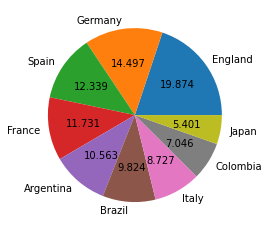

In [49]:

plt.pie(nation,labels=labels,autopct='%.3f')#autopct is used to showthe % value and the dec place


Observation: As shown in the chart top players are mostly from europe. England producing the most player followed by Germany, spain and france. South America has few good teams i.e Brazil, Colombia and Argentina, later being the best team in the region.
    Asia has only team producing the most internationally renound player in top 10 i.e Japan stating Japan is the best team in Asia.

# Age Distribution

<AxesSubplot:xlabel='age', ylabel='count'>

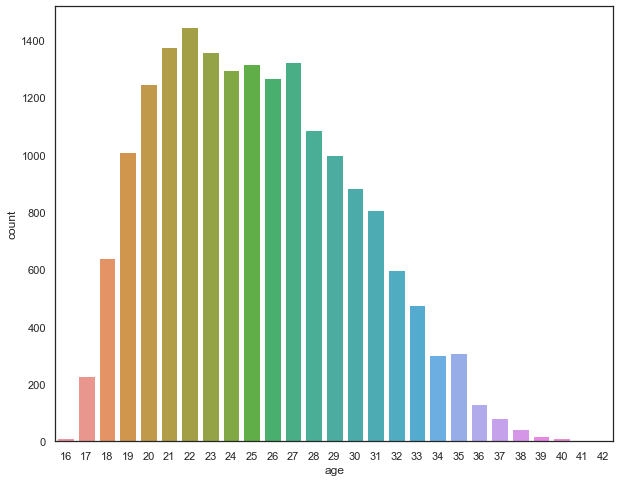

In [125]:
x=data['age']
plt.figure(figsize=(10,8))
sns.countplot(x)


Observation: As we can see the graph is skwed in the left side we can observe that most player playing are from age 20-28 as they have a fully fit body and game practice till that time

# Bivariate analysis

Player with highest salary

In [50]:
data.head(1)

,short_name,age,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,release_clause_eur,team_position,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,L. Messi,32,170,72,Argentina,FC Barcelona,94,94,95500000,565000,"RW, CF, ST",Left,5,4,4,195800000.0,RW,87.0,92.0,92.0,96.0,39.0,66.0,0.0,0.0,0.0,0.0,0.0,0.0,"Beat Offside Trap, Argues with Officials, Earl...",88,95,70,92,88,97,93,94,92,96,91,84,93,95,95,86,68,75,68,94,48,40,94,94,75,96,33,37,26,6,11,15,14,8,91.0,91.0,91.0,95.0,95.0,95.0,95.0,95.0,95.0,95.0,95.0,94.0,89.0,89.0,89.0,94.0,70.0,68.0,68.0,68.0,70.0,65.0,54.0,54.0,54.0,65.0


In [51]:
Most_wage=data[['short_name','wage_eur']]

In [52]:
Most_wage=Most_wage.sort_values(by=['wage_eur'],ascending=0).head(10)

In [53]:
Most_wage

,short_name,wage_eur
0,L. Messi,565000
4,E. Hazard,470000
1,Cristiano Ronaldo,405000
5,K. De Bruyne,370000
22,A. Griezmann,370000
19,L. Suárez,355000
8,L. Modrić,340000
36,T. Kroos,330000
17,S. Agüero,300000
21,Sergio Busquets,300000


Text(0, 0.5, 'Wage Eur')

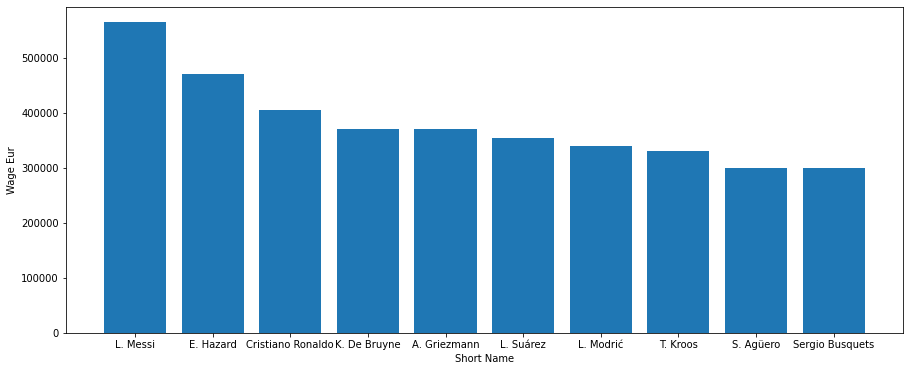

In [54]:
plt.figure(figsize=(15,6))
plt.bar(Most_wage['short_name'],Most_wage['wage_eur'])
plt.xlabel("Short Name")
plt.ylabel("Wage Eur")

As per the Data/graph L.Messi earns the most followed by E.Hazard and Ronaldo.
Making a very intersting observation about E Hazard.

Analysis 2:Most Valuable player

In [55]:
Value=data[['short_name','value_eur']]

In [56]:
Value=Value.sort_values(by='value_eur',ascending=0).head()
Value

,short_name,value_eur
2,Neymar Jr,105500000
0,L. Messi,95500000
10,K. Mbappé,93500000
5,K. De Bruyne,90000000
4,E. Hazard,90000000


Text(0, 0.5, 'value_eur')

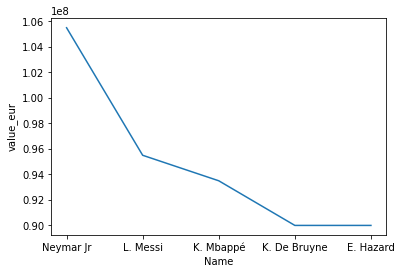

In [57]:
plt.plot(Value['short_name'],Value['value_eur'])
plt.xlabel('Name')
plt.ylabel('value_eur')

Observaion: Neymar is the most valueable player as his skill and pace are highly ranked followed by GOAT Messi.

Best Overall

In [127]:
overall=data[['short_name','overall','team_position']]

In [128]:
overall=overall.sort_values(by='overall',ascending=0).head(10)

In [129]:
overall

,short_name,overall,team_position
0,L. Messi,94,RW
1,Cristiano Ronaldo,93,LW
2,Neymar Jr,92,CAM
3,J. Oblak,91,GK
4,E. Hazard,91,LW
5,K. De Bruyne,91,RCM
6,M. ter Stegen,90,GK
7,V. van Dijk,90,LCB
8,L. Modrić,90,RCM
9,M. Salah,90,RW


Text(0.5, 0, 'Name')

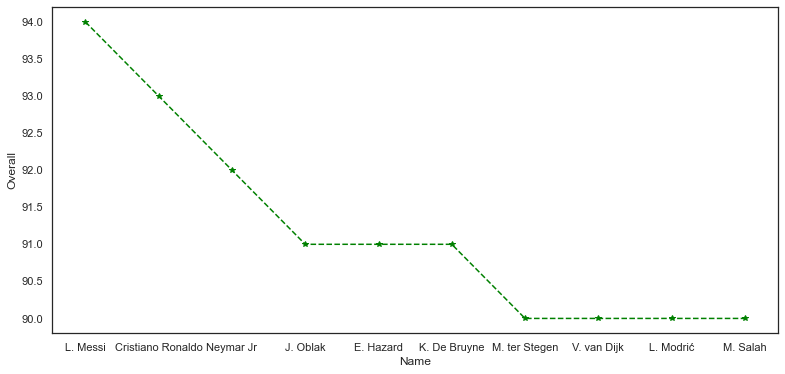

In [130]:
plt.figure(figsize=(13,6))
plt.plot(overall['short_name'],overall['overall'],linestyle='--',marker='*',color='green')
plt.ylabel('Overall')
plt.xlabel('Name')


Observation: L.Messi has the best overall among all showing he is the best player of the genration followed by his rival C. Ronaldo

Top 5 GK

In [62]:
data.filter(['player_positions'])=='GK'


,player_positions
0,False
1,False
2,False
3,True
4,False
...,...
18273,False
18274,False
18275,False
18276,False


In [63]:
df=data['player_positions']=='GK'
df=df[df == True].index.tolist()
df

[3,
 6,
 13,
 14,
 25,
 28,
 30,
 31,
 32,
 53,
 60,
 74,
 86,
 87,
 88,
 91,
 111,
 122,
 125,
 130,
 131,
 137,
 167,
 181,
 184,
 193,
 196,
 200,
 201,
 202,
 206,
 211,
 223,
 242,
 248,
 250,
 251,
 257,
 264,
 267,
 268,
 272,
 286,
 293,
 294,
 324,
 333,
 342,
 351,
 364,
 365,
 376,
 386,
 388,
 415,
 427,
 431,
 456,
 460,
 466,
 467,
 485,
 486,
 489,
 492,
 493,
 496,
 498,
 499,
 500,
 508,
 511,
 518,
 537,
 558,
 565,
 572,
 627,
 628,
 648,
 667,
 682,
 697,
 704,
 714,
 725,
 747,
 751,
 753,
 782,
 792,
 807,
 808,
 814,
 842,
 850,
 861,
 865,
 875,
 887,
 899,
 907,
 915,
 933,
 955,
 967,
 981,
 983,
 993,
 1019,
 1072,
 1074,
 1090,
 1094,
 1099,
 1101,
 1111,
 1124,
 1130,
 1134,
 1136,
 1138,
 1157,
 1161,
 1174,
 1186,
 1217,
 1234,
 1240,
 1257,
 1283,
 1287,
 1292,
 1300,
 1302,
 1316,
 1328,
 1346,
 1357,
 1372,
 1373,
 1374,
 1385,
 1386,
 1389,
 1394,
 1396,
 1398,
 1403,
 1421,
 1429,
 1435,
 1450,
 1453,
 1458,
 1460,
 1480,
 1490,
 1518,
 1532,
 1542,


In [64]:
GK=data.iloc[df]
GK=GK[['short_name','player_positions','overall','nationality','height_cm']]
GK_Scale=GK[['overall','height_cm']]

In [65]:
GK1=GK.sort_values(by='overall',ascending=0).head(10)
GK1.head(10)

,short_name,player_positions,overall,nationality,height_cm
3,J. Oblak,GK,91,Slovenia,188
6,M. ter Stegen,GK,90,Germany,187
13,Alisson,GK,89,Brazil,191
14,De Gea,GK,89,Spain,192
25,Ederson,GK,88,Brazil,188
28,T. Courtois,GK,88,Belgium,199
30,S. Handanovič,GK,88,Slovenia,193
31,M. Neuer,GK,88,Germany,193
32,H. Lloris,GK,88,France,188
53,K. Navas,GK,87,Costa Rica,185


In [66]:
GK2=GK.sort_values(by='height_cm',ascending=0).head(10)
GK2.head(10)

,short_name,player_positions,overall,nationality,height_cm
9208,T. Holý,GK,66,Czech Republic,205
3121,C. Pantilimon,GK,73,Romania,203
12808,A. Chapman,GK,63,England,203
4868,V. Milinković-Savić,GK,70,Serbia,202
18034,D. Thiam,GK,51,Senegal,202
17149,S. Brolin,GK,55,Sweden,202
7725,K. Scherpen,GK,67,Netherlands,202
4141,K. Letica,GK,71,Croatia,201
11561,E. Johansen,GK,64,Norway,201
1834,L. Kalinić,GK,75,Croatia,201


In [67]:
GK1['height_cm'].mean()

190.4

In [68]:
GK1['overall'].mean()

88.6

In [69]:
190.4376227897839/88.79666011787819

2.1446484871950884

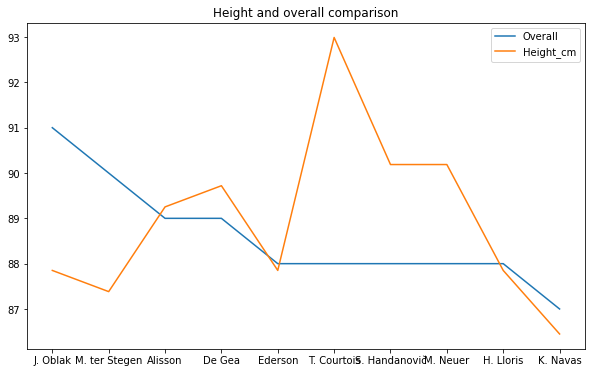

In [70]:
plt.figure(figsize=(10,6))
plt.plot(GK1['short_name'],GK1['overall'],label='Overall')
plt.plot(GK1['short_name'],GK1['height_cm']/2.14,label='Height_cm')
plt.title('Height and overall comparison')
plt.legend()
plt.show()

Observation= This graph was to determine if height can alter the ability to become better in GK the graph stats after a certain height all depends upon the skill.

# Dream Team Position(4-2-3-1)

In [131]:
st=data['team_position']=='ST'
st=st[st == True].index.tolist()
st

[12,
 17,
 19,
 20,
 34,
 71,
 72,
 96,
 138,
 141,
 152,
 163,
 183,
 186,
 188,
 205,
 234,
 241,
 273,
 276,
 288,
 300,
 310,
 321,
 348,
 367,
 368,
 430,
 461,
 473,
 488,
 494,
 529,
 600,
 645,
 661,
 666,
 696,
 701,
 710,
 718,
 736,
 737,
 748,
 809,
 860,
 892,
 948,
 963,
 973,
 988,
 1014,
 1034,
 1068,
 1146,
 1147,
 1155,
 1171,
 1180,
 1190,
 1195,
 1201,
 1203,
 1209,
 1211,
 1274,
 1275,
 1279,
 1415,
 1428,
 1437,
 1441,
 1443,
 1469,
 1473,
 1536,
 1545,
 1547,
 1557,
 1558,
 1569,
 1603,
 1606,
 1637,
 1740,
 1767,
 1777,
 1787,
 1861,
 1917,
 1937,
 1984,
 1992,
 2034,
 2118,
 2130,
 2206,
 2210,
 2214,
 2236,
 2336,
 2340,
 2356,
 2425,
 2428,
 2446,
 2507,
 2510,
 2534,
 2543,
 2561,
 2583,
 2593,
 2598,
 2633,
 2634,
 2635,
 2643,
 2644,
 2685,
 2712,
 2738,
 2782,
 2800,
 2846,
 2850,
 2863,
 2873,
 2889,
 2893,
 2908,
 2942,
 2969,
 2971,
 2976,
 3017,
 3029,
 3080,
 3085,
 3095,
 3111,
 3114,
 3133,
 3137,
 3143,
 3148,
 3172,
 3191,
 3204,
 3214,
 3215,
 3

In [132]:
ST=data.iloc[st]
ST.sort_values(by='overall',ascending=0)
#H. Kane

,short_name,age,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,release_clause_eur,team_position,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
12,H. Kane,25,188,89,England,Tottenham Hotspur,89,91,83000000,220000,ST,Right,3,4,3,159800000.0,ST,70.0,91.0,79.0,81.0,47.0,83.0,0.0,0.0,0.0,0.0,0.0,0.0,"Injury Free, Avoids Using Weaker Foot, Argues ...",75,94,86,81,85,80,78,68,83,84,68,72,71,91,73,90,79,87,84,86,78,35,93,81,90,91,56,36,38,8,10,11,14,11,89.0,89.0,89.0,85.0,87.0,87.0,87.0,85.0,86.0,86.0,86.0,85.0,82.0,82.0,82.0,85.0,68.0,69.0,69.0,69.0,68.0,65.0,63.0,63.0,63.0,65.0
19,L. Suárez,32,182,86,Uruguay,FC Barcelona,89,89,53000000,355000,ST,Right,5,4,3,108700000.0,ST,73.0,89.0,80.0,84.0,51.0,84.0,0.0,0.0,0.0,0.0,0.0,0.0,"Diver, Speed Dribbler (CPU AI Only)",78,91,83,82,90,85,86,82,72,84,76,70,79,92,79,88,69,82,86,86,87,41,92,82,83,85,57,45,38,27,25,31,33,37,91.0,91.0,91.0,88.0,90.0,90.0,90.0,88.0,89.0,89.0,89.0,87.0,84.0,84.0,84.0,87.0,72.0,72.0,72.0,72.0,72.0,69.0,68.0,68.0,68.0,69.0
20,R. Lewandowski,30,184,80,Poland,FC Bayern München,89,89,64500000,235000,ST,Right,4,4,4,106400000.0,ST,77.0,87.0,74.0,85.0,41.0,82.0,0.0,0.0,0.0,0.0,0.0,0.0,"Diver, Beat Offside Trap, Speed Dribbler (CPU ...",62,88,85,82,88,85,77,85,65,88,77,77,78,90,82,87,84,78,84,84,81,39,91,77,86,86,34,42,19,15,6,12,8,10,89.0,89.0,89.0,85.0,88.0,88.0,88.0,85.0,86.0,86.0,86.0,83.0,80.0,80.0,80.0,83.0,64.0,65.0,65.0,65.0,64.0,61.0,60.0,60.0,60.0,61.0
17,S. Agüero,31,173,70,Argentina,Manchester City,89,89,60000000,300000,ST,Right,4,4,4,111000000.0,ST,80.0,90.0,77.0,88.0,33.0,74.0,0.0,0.0,0.0,0.0,0.0,0.0,"Avoids Using Weaker Foot, Outside Foot Shot",70,93,78,83,85,88,83,73,64,89,82,78,84,92,91,89,81,79,74,84,65,24,93,83,83,90,30,29,24,13,15,6,11,14,90.0,90.0,90.0,88.0,90.0,90.0,90.0,88.0,88.0,88.0,88.0,86.0,80.0,80.0,80.0,86.0,63.0,61.0,61.0,61.0,63.0,59.0,53.0,53.0,53.0,59.0
34,E. Cavani,32,185,77,Uruguay,Paris Saint-Germain,88,88,47000000,195000,ST,Right,4,4,3,87000000.0,ST,75.0,86.0,72.0,79.0,55.0,83.0,0.0,0.0,0.0,0.0,0.0,0.0,Long Passer (CPU AI Only),70,88,89,78,90,79,77,76,52,81,74,76,74,91,59,88,88,91,79,79,84,54,93,77,85,80,57,48,39,12,5,13,13,10,88.0,88.0,88.0,83.0,86.0,86.0,86.0,83.0,83.0,83.0,83.0,82.0,78.0,78.0,78.0,82.0,71.0,69.0,69.0,69.0,71.0,69.0,68.0,68.0,68.0,69.0
71,C. Immobile,29,185,85,Italy,Lazio,86,86,44500000,105000,ST,Right,3,4,3,75700000.0,ST,80.0,85.0,63.0,81.0,39.0,76.0,0.0,0.0,0.0,0.0,0.0,0.0,Speed Dribbler (CPU AI Only),55,87,81,74,85,83,70,51,49,83,76,83,75,87,63,86,77,79,73,80,77,40,91,65,78,81,34,33,32,6,8,15,12,6,86.0,86.0,86.0,82.0,85.0,85.0,85.0,82.0,81.0,81.0,81.0,79.0,73.0,73.0,73.0,79.0,63.0,60.0,60.0,60.0,63.0,60.0,57.0,57.0,57.0,60.0
72,A. Lacazette,28,175,73,France,Arsenal,86,86,46000000,165000,ST,Right,3,4,4,87400000.0,ST,82.0,85.0,75.0,86.0,40.0,74.0,0.0,0.0,0.0,0.0,0.0,0.0,"Selfish, Speed Dribbler (CPU AI Only), Crowd F...",68,87,74,81,82,86,74,74,69,86,82,82,85,86,85,86,76,79,73,78,72,42,87,78,84,86,29,42,30,11,6,9,5,6,86.0,86.0,86.0,85.0,87.0,87.0,87.0,85.0,85.0,85.0,85.0,84.0,79.0,79.0,79.0

In [133]:
LW=data['team_position']=='LW'
LW=LW[LW == True].index.tolist()
LW=data.iloc[LW]
LW.sort_values(by='overall',ascending=0) #Cristiano Ronaldo	


CAM=data['team_position']=='CAM'
CAM=CAM[CAM == True].index.tolist()
CAM=data.iloc[CAM]
CAM.sort_values(by='overall',ascending=0)#Neymar Jr	

RW=data['team_position']=='RW'
RW=RW[RW == True].index.tolist()
RW=data.iloc[RW]
RW.sort_values(by='overall',ascending=0)#L. Messi

LDM=data['team_position']=='LDM'
LDM=LDM[LDM == True].index.tolist()
LDM=data.iloc[LDM]
LDM.sort_values(by='overall',ascending=0)#P. Pogba

RDM=data['team_position']=='RDM'
RDM=RDM[RDM == True].index.tolist()
RDM=data.iloc[RDM]
RDM.sort_values(by='overall',ascending=0) #S. Milinković-Savić

LB=data['team_position']=='LB'
LB=LB[LB == True].index.tolist()
LB=data.iloc[LB]
LB.sort_values(by='overall',ascending=0) #Jordi Alba

LCB=data['team_position']=='LCB'
LCB=LCB[LCB == True].index.tolist()
LCB=data.iloc[LCB]
LCB.sort_values(by='overall',ascending=0) #V. van Dijk

RCB=data['team_position']=='RCB'
RCB=RCB[RCB == True].index.tolist()
RCB=data.iloc[RCB]
RCB.sort_values(by='overall',ascending=0) #Piqué

RB=data['team_position']=='RB'
RB=RB[RB == True].index.tolist()
RB=data.iloc[RB]
RB.sort_values(by='overall',ascending=0) #J. Kimmich

GK=data['team_position']=='GK'
GK=GK[GK == True].index.tolist()
GK=data.iloc[GK]
GK.sort_values(by='overall',ascending=0) #J. Oblak

,short_name,age,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,release_clause_eur,team_position,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
3,J. Oblak,26,188,87,Slovenia,Atlético Madrid,91,93,77500000,125000,GK,Right,3,3,1,164700000.0,GK,0.0,0.0,0.0,0.0,0.0,0.0,87.0,92.0,78.0,89.0,52.0,90.0,"Flair, Acrobatic Clearance",13,11,15,43,13,12,13,14,40,30,43,60,67,88,49,59,78,41,78,12,34,19,11,65,11,68,27,12,18,87,92,78,90,89,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,M. ter Stegen,27,187,85,Germany,FC Barcelona,90,93,67500000,250000,GK,Right,3,4,1,143400000.0,GK,0.0,0.0,0.0,0.0,0.0,0.0,88.0,85.0,88.0,90.0,45.0,88.0,"Swerve Pass, Acrobatic Clearance, Flair Passes",18,14,11,61,14,21,18,12,63,30,38,50,37,86,43,66,79,35,78,10,43,22,11,70,25,70,25,13,10,88,85,88,88,90,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13,Alisson,26,191,91,Brazil,Liverpool,89,91,58000000,155000,GK,Right,3,3,1,111700000.0,GK,0.0,0.0,0.0,0.0,0.0,0.0,85.0,84.0,85.0,89.0,51.0,90.0,"Flair, Swerve Pass",17,13,19,45,20,27,19,18,44,30,56,47,40,88,37,64,52,32,78,14,27,11,13,66,23,65,15,19,16,85,84,85,90,89,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14,De Gea,28,192,82,Spain,Manchester United,89,90,56000000,205000,GK,Right,4,3,1,110600000.0,GK,0.0,0.0,0.0,0.0,0.0,0.0,90.0,84.0,81.0,92.0,58.0,85.0,"Flair, Second Wind, Flair Passes",17,13,21,50,13,18,21,19,47,38,57,58,63,87,43,61,67,43,60,12,38,30,12,65,29,68,25,21,13,90,84,81,85,92,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
30,S. Handanovič,34,193,92,Slovenia,Inter,88,88,26000000,110000,GK,Right,3,2,1,44200000.0,GK,0.0,0.0,0.0,0.0,0.0,0.0,88.0,85.0,69.0,89.0,53.0,89.0,"Flair, Giant Throw-in",12,10,10,36,12,12,12,14,34,16,51,55,47,83,36,52,78,41,71,19,25,22,12,41,23,69,25,10,13,88,85,69,89,89,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17072,Shen Jun,32,186,88,China PR,Shanghai Greenland Shenhua FC,56,56,50000,2000,GK,Right,1,1,1,78000.0,GK,0.0,0.0,0.0,0.0,0.0,0.0,57.0,48.0,56.0,62.0,44.0,56.0,NA,11,14,15,26,16,11,20,17,21,16,40,47,30,52,48,42,55,32,72,12,19,23,14,16,24,22,23,17,13,57,48,56,56,62,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17341,M. McGinley,29,185,86,Republic of Ireland,Finn Harps,55,57,70000,1000,GK,Right,1,2,1,114000.0,GK,0.0,0.0,0.0,0.0,0.0,0.0,55.0,55.0,52.0,57.0,41.0,55.0,NA,13,15,11,15,12,12,19,15,13,24,40,42,54,47,49,39,50,31,61,14,34,11,13,10,13,47,12,19,

In [134]:
DREAM_TEAM=['ST= H. Kane','LAM= Cristiano Ronaldo','CAM=Neymar Jr','RAM= L. Messi','LDM= P. Pogba','RDM= S. Milinković-Savić','LB= Jordi Alba','LCB= V. van Dijk','RCB= Piqué','RB= J. Kimmich','GK= J. Oblak']

In [135]:
DREAM_TEAM

['ST= H. Kane',
 'LAM= Cristiano Ronaldo',
 'CAM=Neymar Jr',
 'RAM= L. Messi',
 'LDM= P. Pogba',
 'RDM= S. Milinković-Savić',
 'LB= Jordi Alba',
 'LCB= V. van Dijk',
 'RCB= Piqué',
 'RB= J. Kimmich',
 'GK= J. Oblak']

In [72]:
data.describe().columns

Index(['age', 'height_cm', 'weight_kg', 'overall', 'potential', 'value_eur',
       'wage_eur', 'international_reputation', 'weak_foot', 'skill_moves',
       'release_clause_eur', 'pace', 'shooting', 'passing', 'dribbling',
       'defending', 'physic', 'gk_diving', 'gk_handling', 'gk_kicking',
       'gk_reflexes', 'gk_speed', 'gk_positioning', 'attacking_crossing',
       'attacking_finishing', 'attacking_heading_accuracy',
       'attacking_short_passing', 'attacking_volleys', 'skill_dribbling',
       'skill_curve', 'skill_fk_accuracy', 'skill_long_passing',
       'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed',
       'movement_agility', 'movement_reactions', 'movement_balance',
       'power_shot_power', 'power_jumping', 'power_stamina', 'power_strength',
       'power_long_shots', 'mentality_aggression', 'mentality_interceptions',
       'mentality_positioning', 'mentality_vision', 'mentality_penalties',
       'mentality_composure', 'defending_marking',

Using K means to perform unsupervised ML

Using skills and traits categorize similar player.

In [73]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18278 entries, 0 to 18277
Data columns (total 90 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   short_name                  18278 non-null  object 
 1   age                         18278 non-null  int64  
 2   height_cm                   18278 non-null  int64  
 3   weight_kg                   18278 non-null  int64  
 4   nationality                 18278 non-null  object 
 5   club                        18278 non-null  object 
 6   overall                     18278 non-null  int64  
 7   potential                   18278 non-null  int64  
 8   value_eur                   18278 non-null  int64  
 9   wage_eur                    18278 non-null  int64  
 10  player_positions            18278 non-null  object 
 11  preferred_foot              18278 non-null  object 
 12  international_reputation    18278 non-null  int64  
 13  weak_foot                   182

Removing unwanted info. i.e team position as we have to determine the same using clustering

In [74]:
FIFA=data[['short_name','age', 'height_cm', 'weight_kg', 'overall', 'potential', 'value_eur',
       'wage_eur', 'international_reputation', 'weak_foot', 'skill_moves',
       'release_clause_eur', 'pace', 'shooting', 'passing', 'dribbling',
       'defending', 'physic', 'gk_diving', 'gk_handling', 'gk_kicking',
       'gk_reflexes', 'gk_speed', 'gk_positioning', 'attacking_crossing',
       'attacking_finishing', 'attacking_heading_accuracy',
       'attacking_short_passing', 'attacking_volleys', 'skill_dribbling',
       'skill_curve', 'skill_fk_accuracy', 'skill_long_passing',
       'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed',
       'movement_agility', 'movement_reactions', 'movement_balance',
       'power_shot_power', 'power_jumping', 'power_stamina', 'power_strength',
       'power_long_shots', 'mentality_aggression', 'mentality_interceptions',
       'mentality_positioning', 'mentality_vision', 'mentality_penalties',
       'mentality_composure', 'defending_marking', 'defending_standing_tackle',
       'defending_sliding_tackle', 'goalkeeping_diving',
       'goalkeeping_handling', 'goalkeeping_kicking',
       'goalkeeping_positioning', 'goalkeeping_reflexes', 'ls', 'st', 'rs',
       'lw', 'lf', 'cf', 'rf', 'rw', 'lam', 'cam', 'ram', 'lm', 'lcm', 'cm',
       'rcm', 'rm', 'lwb', 'ldm', 'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb',
       'rcb', 'rb']]

In [75]:
FIFA.head()

,short_name,age,height_cm,weight_kg,overall,potential,value_eur,wage_eur,international_reputation,weak_foot,skill_moves,release_clause_eur,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,L. Messi,32,170,72,94,94,95500000,565000,5,4,4,195800000.0,87.0,92.0,92.0,96.0,39.0,66.0,0.0,0.0,0.0,0.0,0.0,0.0,88,95,70,92,88,97,93,94,92,96,91,84,93,95,95,86,68,75,68,94,48,40,94,94,75,96,33,37,26,6,11,15,14,8,91.0,91.0,91.0,95.0,95.0,95.0,95.0,95.0,95.0,95.0,95.0,94.0,89.0,89.0,89.0,94.0,70.0,68.0,68.0,68.0,70.0,65.0,54.0,54.0,54.0,65.0
1,Cristiano Ronaldo,34,187,83,93,93,58500000,405000,5,4,5,96500000.0,90.0,93.0,82.0,89.0,35.0,78.0,0.0,0.0,0.0,0.0,0.0,0.0,84,94,89,83,87,89,81,76,77,92,89,91,87,96,71,95,95,85,78,93,63,29,95,82,85,95,28,32,24,7,11,15,14,11,94.0,94.0,94.0,92.0,93.0,93.0,93.0,92.0,91.0,91.0,91.0,91.0,84.0,84.0,84.0,91.0,68.0,64.0,64.0,64.0,68.0,64.0,56.0,56.0,56.0,64.0
2,Neymar Jr,27,175,68,92,92,105500000,290000,5,5,5,195200000.0,91.0,85.0,87.0,95.0,32.0,58.0,0.0,0.0,0.0,0.0,0.0,0.0,87,87,62,87,87,96,88,87,81,95,94,89,96,92,84,80,61,81,49,84,51,36,87,90,90,94,27,26,29,9,9,15,15,11,87.0,87.0,87.0,93.0,92.0,92.0,92.0,93.0,93.0,93.0,93.0,92.0,85.0,85.0,85.0,92.0,69.0,64.0,64.0,64.0,69.0,64.0,49.0,49.0,49.0,64.0
3,J. Oblak,26,188,87,91,93,77500000,125000,3,3,1,164700000.0,0.0,0.0,0.0,0.0,0.0,0.0,87.0,92.0,78.0,89.0,52.0,90.0,13,11,15,43,13,12,13,14,40,30,43,60,67,88,49,59,78,41,78,12,34,19,11,65,11,68,27,12,18,87,92,78,90,89,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,E. Hazard,28,175,74,91,91,90000000,470000,4,4,4,184500000.0,91.0,83.0,86.0,94.0,35.0,66.0,0.0,0.0,0.0,0.0,0.0,0.0,81,84,61,89,83,95,83,79,83,94,94,88,95,90,94,82,56,84,63,80,54,41,87,89,88,91,34,27,22,11,12,6,8,8,86.0,86.0,86.0,92.0,91.0,91.0,91.0,92.0,92.0,92.0,92.0,92.0,86.0,86.0,86.0,92.0,69.0,66.0,66.0,66.0,69.0,64.0,52.0,52.0,52.0,64.0


Creating top player list whose overall is greater then 80 for the classification

In [76]:
FIFA=FIFA[FIFA.overall>85]

In [77]:
FIFA.value_counts().sum()

73

creating a list and ruturing the name to make all numeric DF

In [78]:
name=FIFA.short_name.to_list()

In [79]:
name

['L. Messi',
 'Cristiano Ronaldo',
 'Neymar Jr',
 'J. Oblak',
 'E. Hazard',
 'K. De Bruyne',
 'M. ter Stegen',
 'V. van Dijk',
 'L. Modrić',
 'M. Salah',
 'K. Mbappé',
 'K. Koulibaly',
 'H. Kane',
 'Alisson',
 'De Gea',
 'N. Kanté',
 'G. Chiellini',
 'S. Agüero',
 'Sergio Ramos',
 'L. Suárez',
 'R. Lewandowski',
 'Sergio Busquets',
 'A. Griezmann',
 'P. Dybala',
 'P. Pogba',
 'Ederson',
 'R. Sterling',
 'C. Eriksen',
 'T. Courtois',
 'Piqué',
 'S. Handanovič',
 'M. Neuer',
 'H. Lloris',
 'David Silva',
 'E. Cavani',
 'D. Godín',
 'T. Kroos',
 'M. Reus',
 'P. Aubameyang',
 'S. Mané',
 'A. Laporte',
 'Bernardo Silva',
 'Casemiro',
 'H. Son',
 'Fernandinho',
 'Thiago Silva',
 'K. Benzema',
 'J. Vertonghen',
 'D. Mertens',
 'M. Hummels',
 'T. Alderweireld',
 'Jordi Alba',
 'Thiago',
 'K. Navas',
 'L. Insigne',
 'L. Sané',
 'Marquinhos',
 'M. Škriniar',
 'M. Verratti',
 'S. Umtiti',
 'W. Szczęsny',
 'J. Kimmich',
 'Isco',
 'Roberto Firmino',
 'I. Rakitić',
 'M. Pjanić',
 'A. Di María',
 'L.

Dropping the short name column

In [80]:
FIFA=FIFA.drop(['short_name'],axis=1)

In [81]:
FIFA.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73 entries, 0 to 72
Data columns (total 83 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   age                         73 non-null     int64  
 1   height_cm                   73 non-null     int64  
 2   weight_kg                   73 non-null     int64  
 3   overall                     73 non-null     int64  
 4   potential                   73 non-null     int64  
 5   value_eur                   73 non-null     int64  
 6   wage_eur                    73 non-null     int64  
 7   international_reputation    73 non-null     int64  
 8   weak_foot                   73 non-null     int64  
 9   skill_moves                 73 non-null     int64  
 10  release_clause_eur          73 non-null     float64
 11  pace                        73 non-null     float64
 12  shooting                    73 non-null     float64
 13  passing                     73 non-nu

# Import KMeans Algorithm from Scikit-learn library

# Initialise the model with K as 5 as 5 position to be deterined (Forward, Wing, Midfielder, Defender, Goalkeeper)


In [82]:
FIFA=FIFA.astype(float)

In [83]:
FIFA.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73 entries, 0 to 72
Data columns (total 83 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   age                         73 non-null     float64
 1   height_cm                   73 non-null     float64
 2   weight_kg                   73 non-null     float64
 3   overall                     73 non-null     float64
 4   potential                   73 non-null     float64
 5   value_eur                   73 non-null     float64
 6   wage_eur                    73 non-null     float64
 7   international_reputation    73 non-null     float64
 8   weak_foot                   73 non-null     float64
 9   skill_moves                 73 non-null     float64
 10  release_clause_eur          73 non-null     float64
 11  pace                        73 non-null     float64
 12  shooting                    73 non-null     float64
 13  passing                     73 non-nu

In [84]:
from sklearn import preprocessing

x = FIFA.values
scaler = preprocessing.MinMaxScaler()
x_scaled = scaler.fit_transform(x)
X_norm = pd.DataFrame(x_scaled)

In [85]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2) # 2D PCA for the plot
FIFA_SCALED = pd.DataFrame(pca.fit_transform(X_norm))

In [86]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5)

kmeans = kmeans.fit(FIFA_SCALED)

centroid = kmeans.cluster_centers_

clusters = kmeans.labels_.tolist()

In [87]:
FIFA_SCALED['cluster'] = clusters
FIFA_SCALED['name'] = name
FIFA_SCALED.columns = ['x', 'y', 'cluster', 'name']
FIFA_SCALED.head()

,x,y,cluster,name
0,-1.463878,-1.527090,2,L. Messi
1,-1.254800,-1.216045,2,Cristiano Ronaldo
2,-1.238416,-1.636200,2,Neymar Jr
3,5.482225,-0.301501,0,J. Oblak
4,-1.212725,-1.393403,2,E. Hazard


<Figure size 720x432 with 0 Axes>

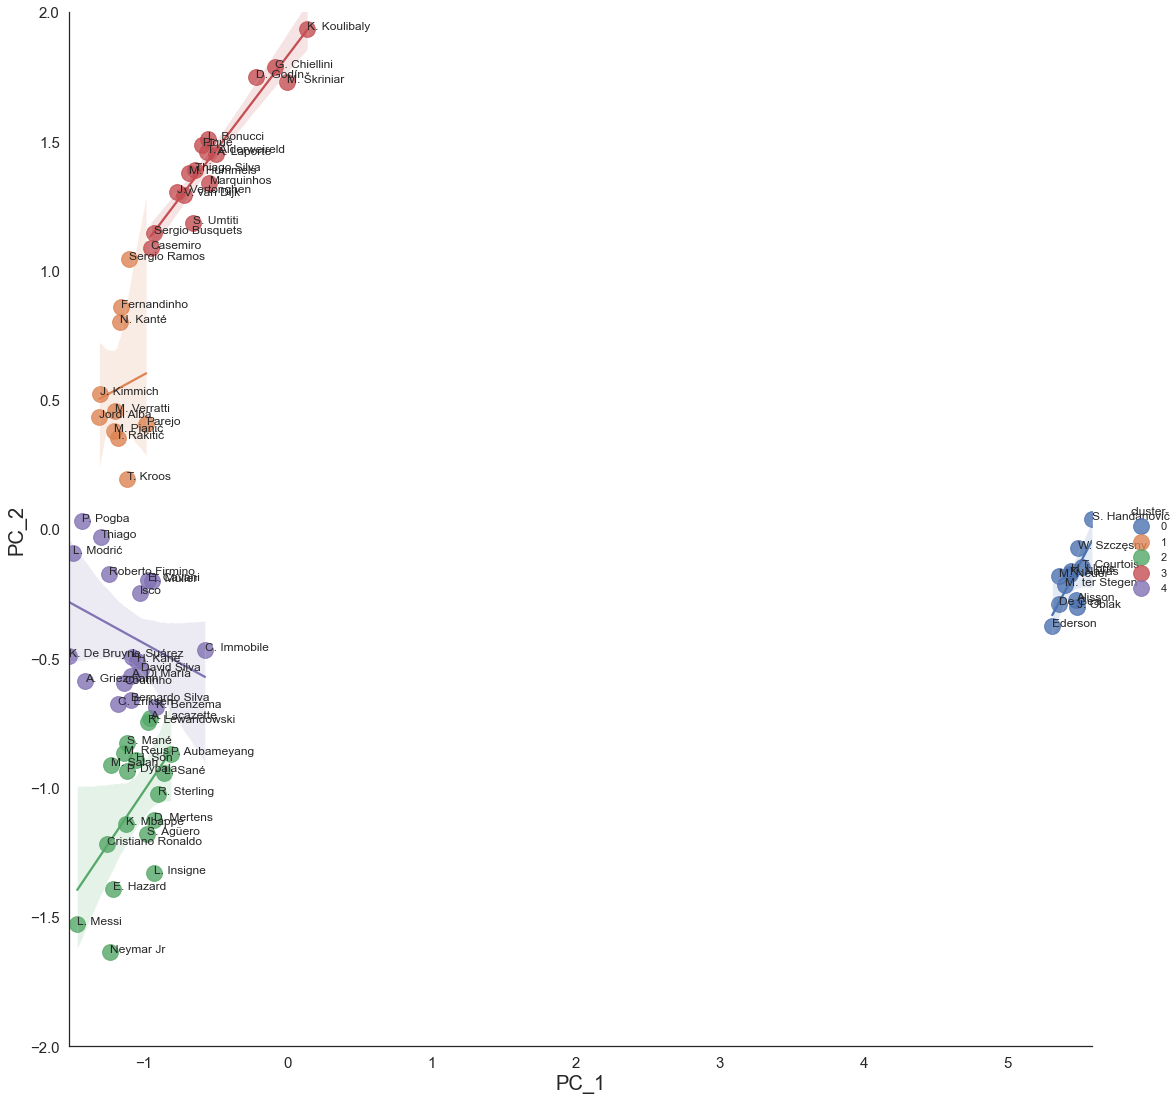

In [89]:
plt.figure(figsize=(10,6))

sns.set(style="white")

ax = sns.lmplot(x="x", y="y", hue='cluster', data = FIFA_SCALED, legend=True,
                   fit_reg=True, size = 15, scatter_kws={"s": 250})

texts = []
for x, y, s in zip(FIFA_SCALED.x, FIFA_SCALED.y, FIFA_SCALED.name):
    texts.append(plt.text(x, y, s))

ax.set(ylim=(-2, 2))
plt.tick_params(labelsize=15)
plt.xlabel("PC_1", fontsize = 20)
plt.ylabel("PC_2", fontsize = 20)

plt.show()



As we can see clearly we have 5 cluster showing 5 positions: Green are the wing player, Purple are the stricker, Red are the midfield, Blue are defence and orange are the Goal keeper